### 1. IMPORT LIBRARY
### 2. MEMUAT DATASET
### 3. EXPLORASI DATA
### 4. PEMBERSIHAN DATASET
### 5. DATA PREPROCESSING
### 6. MENENTUKAN JUMLAH CLUSTER
### 7. MEMBANGUN MODEL CLUSTERING
### 8. PENILAIAN
        FEATURE SELECTION
        MENGGUNAKAN ALGORITMA LAIN

# 1. IMPORT LIBRARY

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import umap.umap_ as umap

sns.set(style="whitegrid")

# 2. MEMUAT DATASET

In [68]:
# Setting style visual
sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

In [69]:
# Load the dataset
df = pd.read_csv("/kaggle/input/bank-transctions-csv/bank_transactions_data_edited.csv")

In [129]:
# === TAMPILKAN HEAD DATASET ===
print("=== Head of Dataset ===")
display(df.fillna(0).head())

=== Head of Dataset ===


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.000000,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.000000,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.000000,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.000000,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,44.678444,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [71]:
# Tampilkan statistik deskriptif hanya untuk kolom numerik
print("\n=== Statistik Deskriptif (kolom numerik) ===")
display(df.describe(include=[np.number]))


=== Statistik Deskriptif (kolom numerik) ===


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [72]:
# Deskriptif statistik kolom numerik
print("\n=== Statistik Deskriptif (Kolom Numerik) ===")
display(df.describe(include=[np.number]))

# Deskriptif statistik kolom kategorikal
print("\n=== Statistik Deskriptif (Kolom Kategorikal) ===")
display(df.describe(include=['object']))


=== Statistik Deskriptif (Kolom Numerik) ===


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000



=== Statistik Deskriptif (Kolom Kategorikal) ===


,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
count,2508,2516,2509,2507,2507,2507,2517,2514,2510,2514,2513
unique,2484,495,2485,2,43,681,591,100,3,4,360
top,TX002326,AC00362,2023-12-22 16:42:33,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,Student,2024-11-04 08:09:17
freq,2,12,2,1942,71,9,12,46,868,657,18


In [73]:
# === TAMPILKAN INFORMASI DATASET ===
print("\n=== Info Dataset ===")
df.info()


=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  Ac

In [74]:
# === STATISTIK DESKRIPTIF ===
print("\n=== Statistik Deskriptif Dataset ===")
# Hindari warning dengan suppress dan hanya numerik
with np.errstate(invalid='ignore'):
    display(df.describe(include='all'))


=== Statistik Deskriptif Dataset ===


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002326,AC00362,NaN,2023-12-22 16:42:33,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


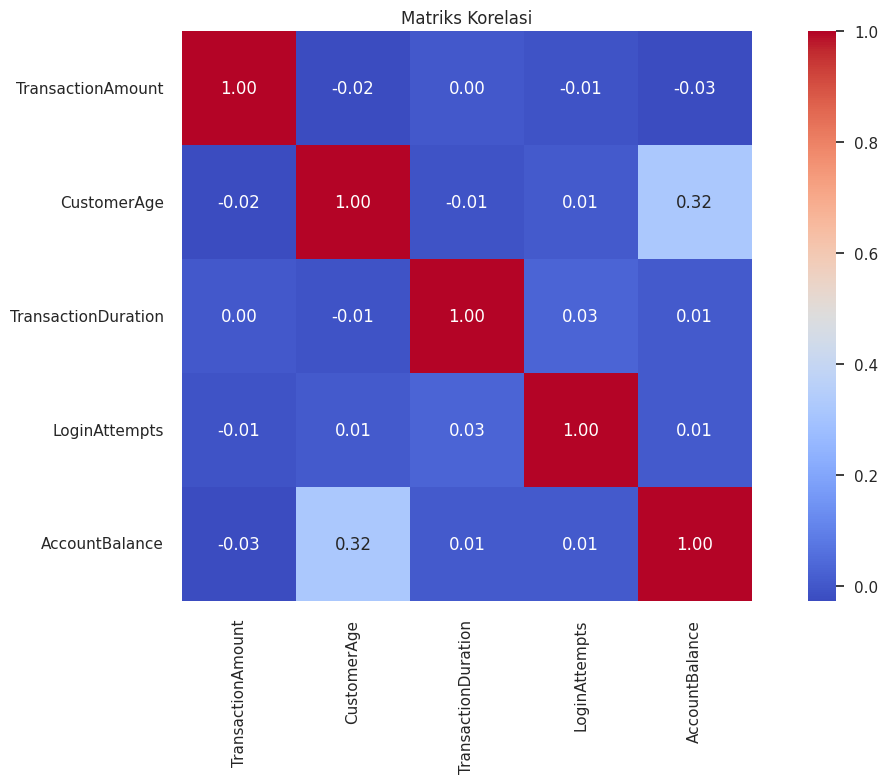

In [75]:
# === MATRICS KORELASI (Numerik saja) ===
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Matriks Korelasi")
plt.tight_layout()
plt.show()


=== Correlation Matrix ===


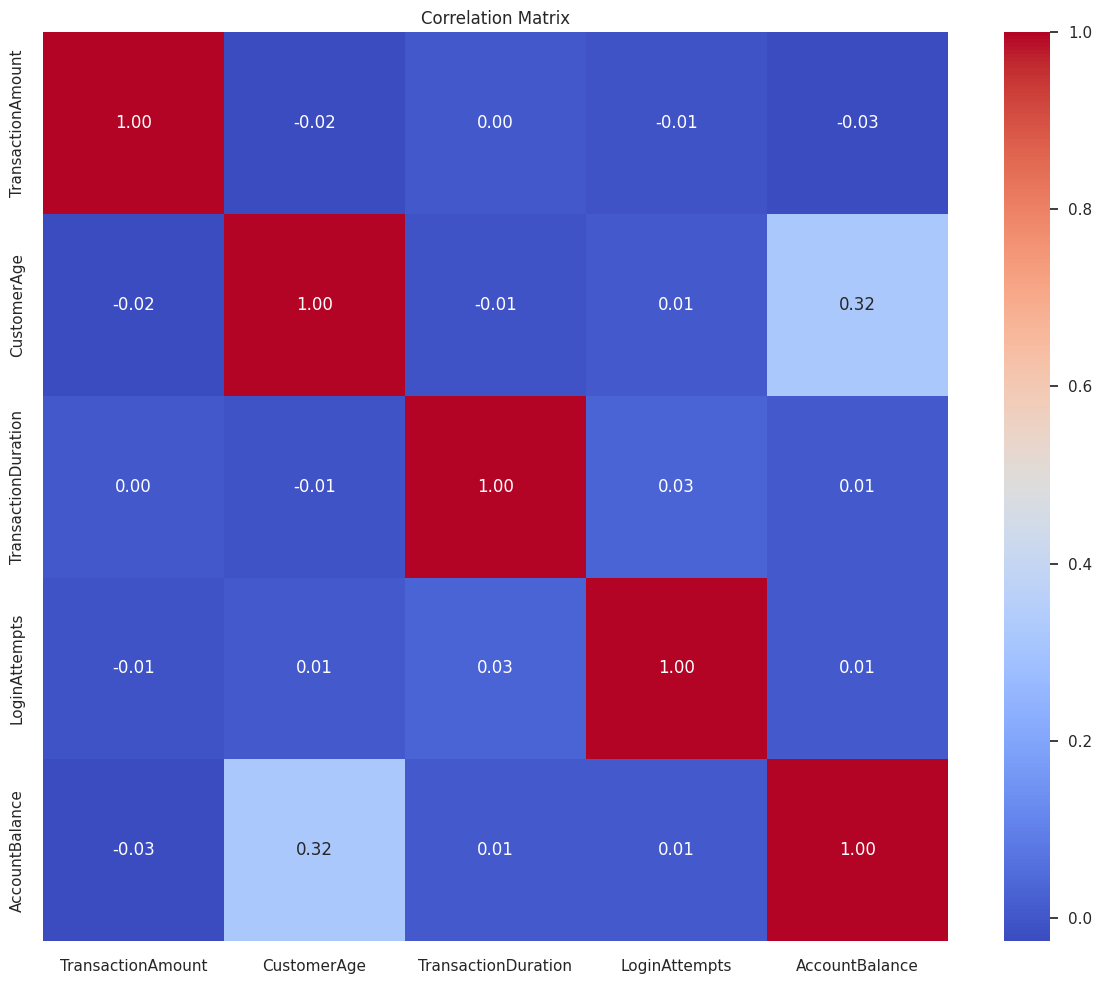

In [76]:
# Calculate and plot the correlation matrix
print("\n=== Correlation Matrix ===")
correlation_matrix = df.corr(numeric_only=True)  # Tambahkan numeric_only=True
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [119]:
def plot_histograms(df):
    cols = df.columns
    n_cols = 3
    n_rows = int(np.ceil(len(cols) / n_cols))

    plt.figure(figsize=(n_cols * 5, n_rows * 4))

    for i, col in enumerate(cols):
        plt.subplot(n_rows, n_cols, i + 1)
        series = df[col].replace([np.inf, -np.inf], np.nan)
        unique_vals = series.nunique(dropna=True)

        if series.dtype == 'object' or unique_vals < 20:
            # Barplot menggunakan matplotlib langsung
            value_counts = series.value_counts(dropna=True).nlargest(20)
            plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
            plt.xticks(rotation=45, ha='right')
            plt.ylabel('Count')
        else:
            sns.histplot(series.dropna(), bins=20, kde=True, color='steelblue')
            plt.ylabel('Frequency')

        plt.title(col)

    plt.tight_layout()
    plt.show()

In [121]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

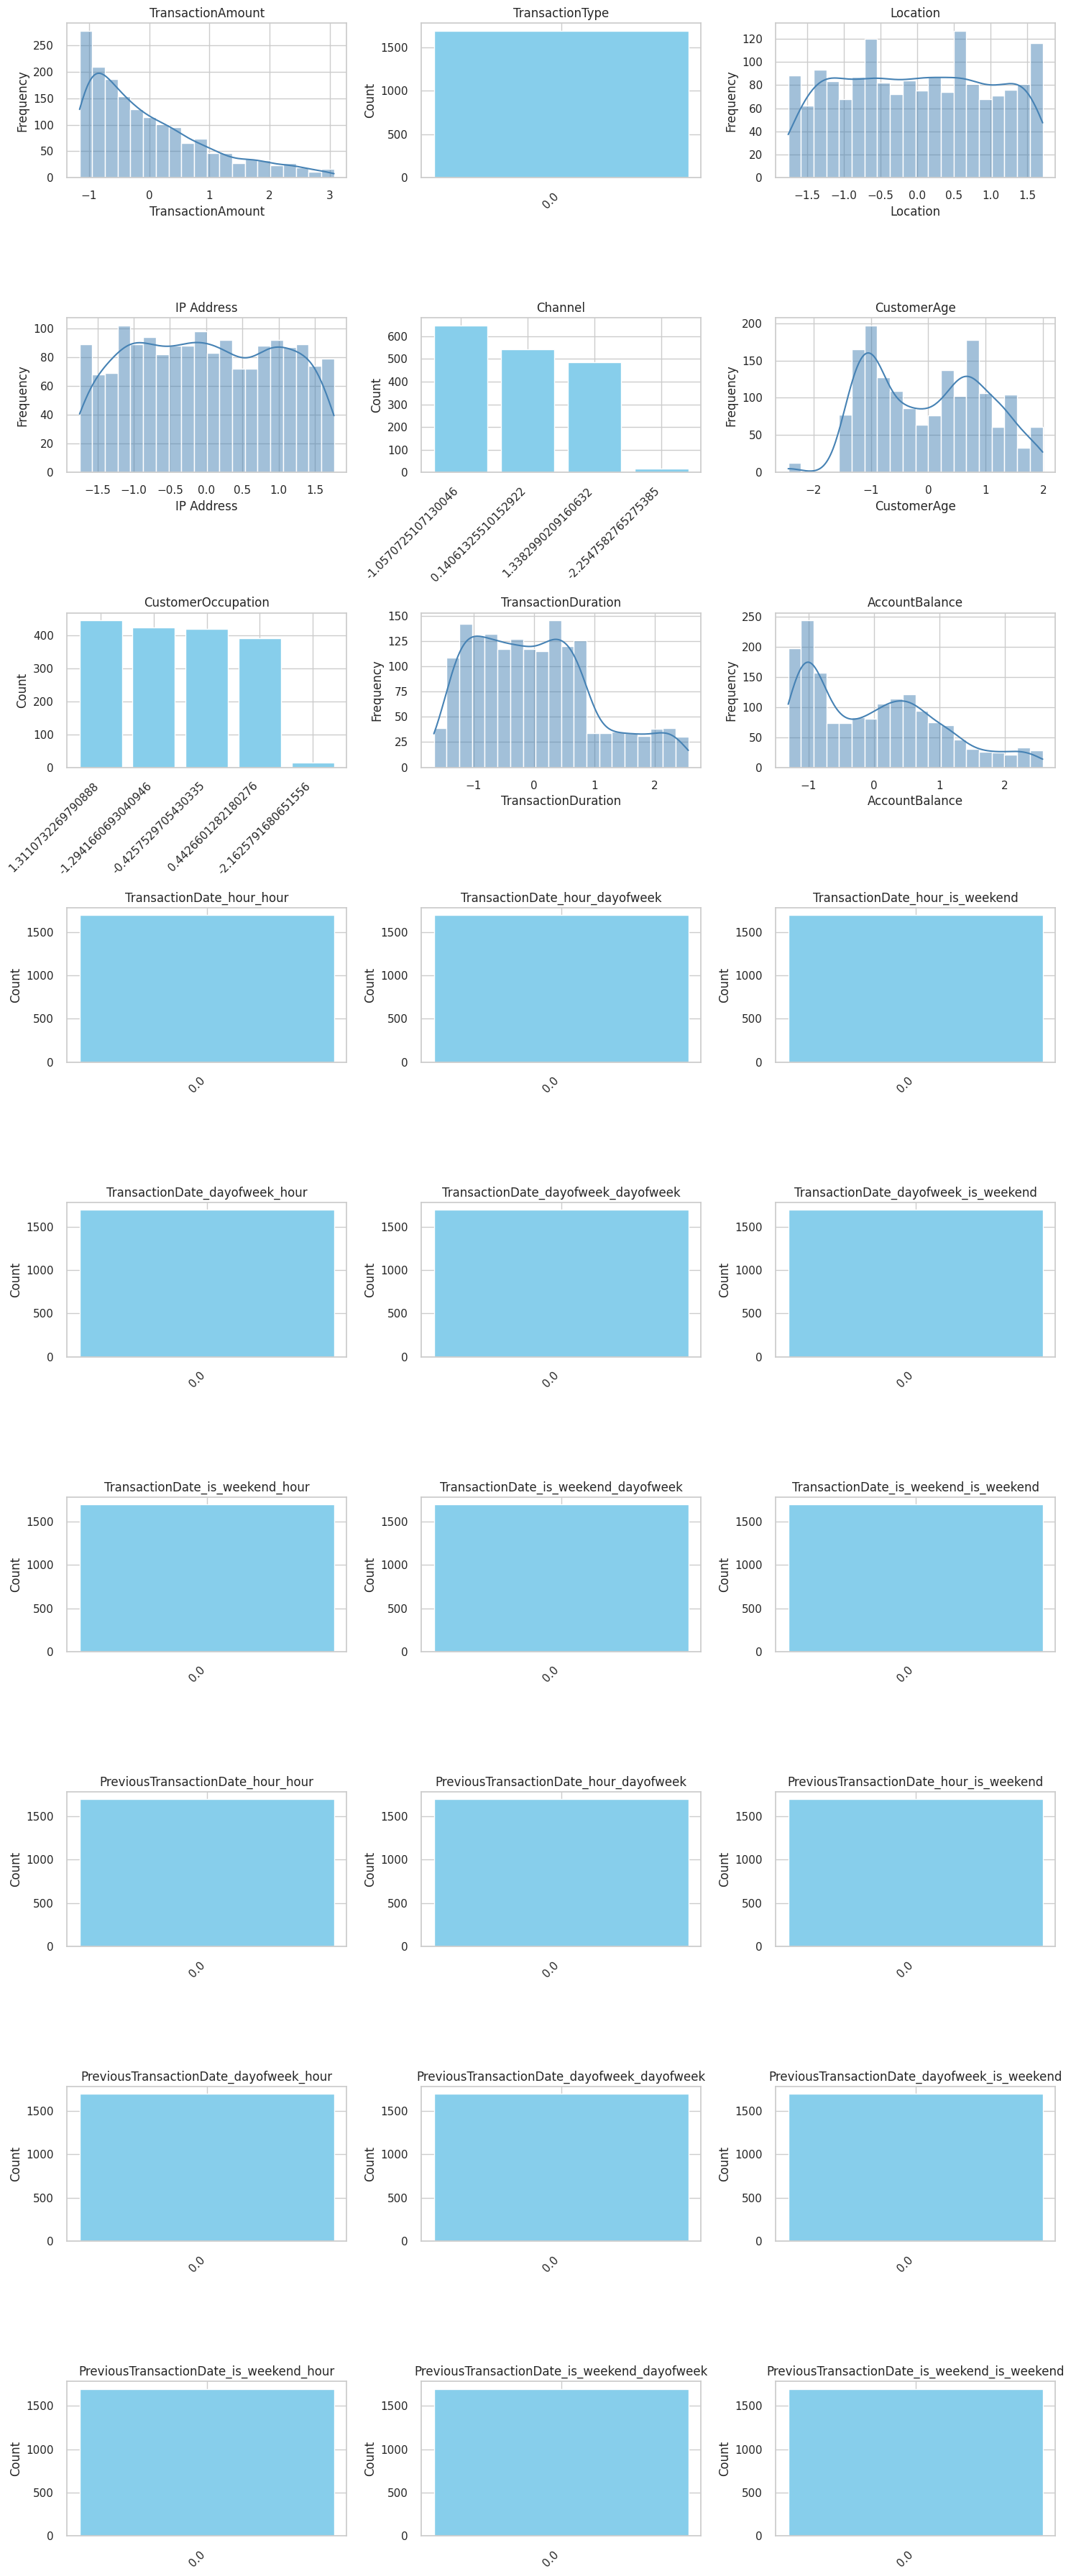

In [124]:
# Kolom yang ingin dilewati
cols_to_skip = ['TransctionType', 'LoginAttempts', '']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Plot
plot_histograms(df.drop(columns=cols_to_skip, errors='ignore'))


=== Head of Dataset ===


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,0.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39



=== Statistik Deskriptif (kolom numerik) ===


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000



=== Statistik Deskriptif (Kolom Numerik) ===


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000



=== Statistik Deskriptif (Kolom Kategorikal) ===


,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
count,2508,2516,2509,2507,2507,2507,2517,2514,2510,2514,2513
unique,2484,495,2485,2,43,681,591,100,3,4,360
top,TX002326,AC00362,2023-12-22 16:42:33,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,Student,2024-11-04 08:09:17
freq,2,12,2,1942,71,9,12,46,868,657,18



=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  Ac

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002326,AC00362,NaN,2023-12-22 16:42:33,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


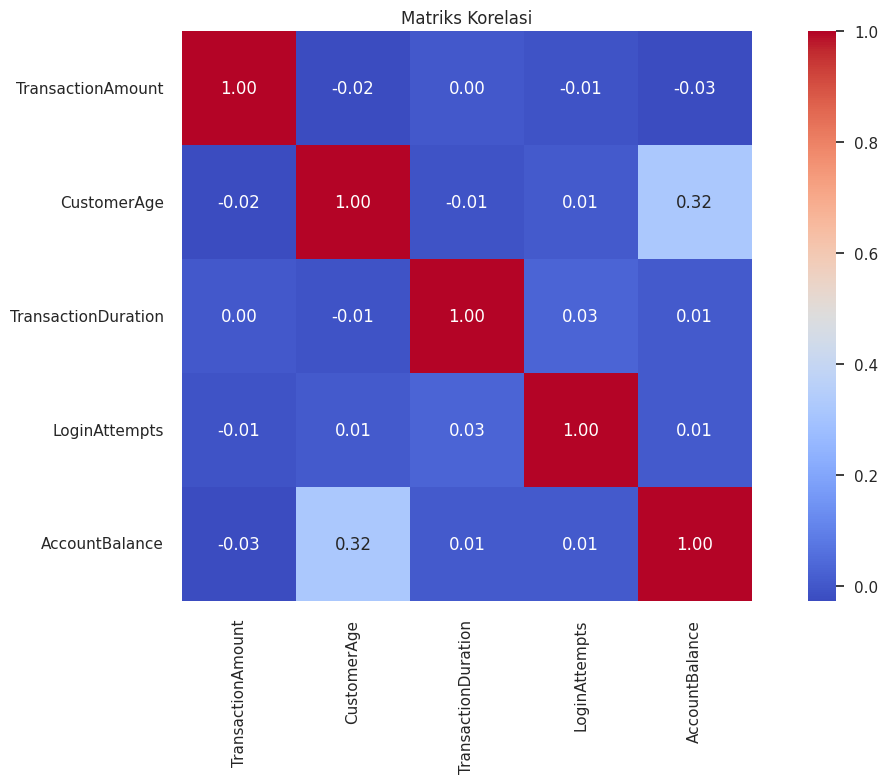


=== Correlation Matrix ===


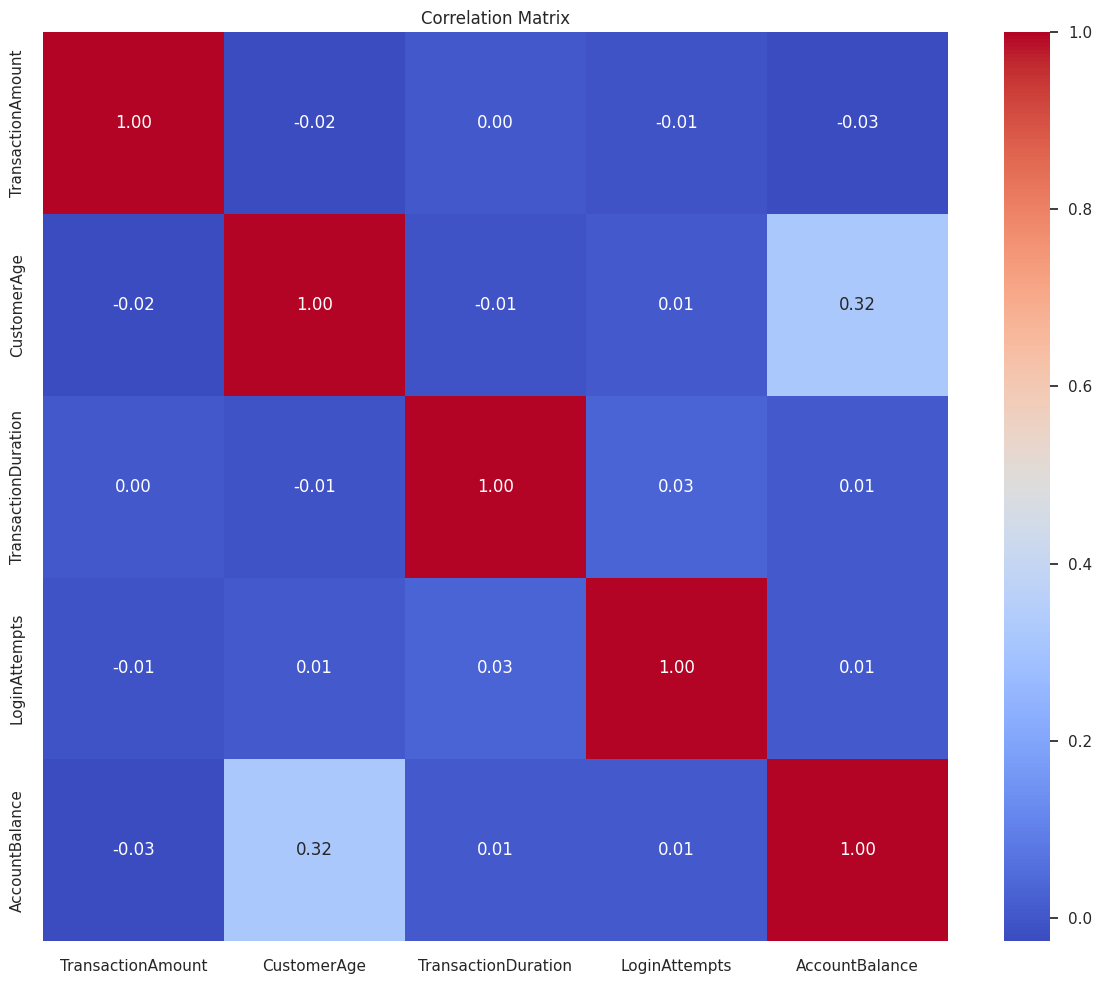

/tmp/ipykernel_35/660050108.py:93: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)  # Replace NaN with the mean
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecate

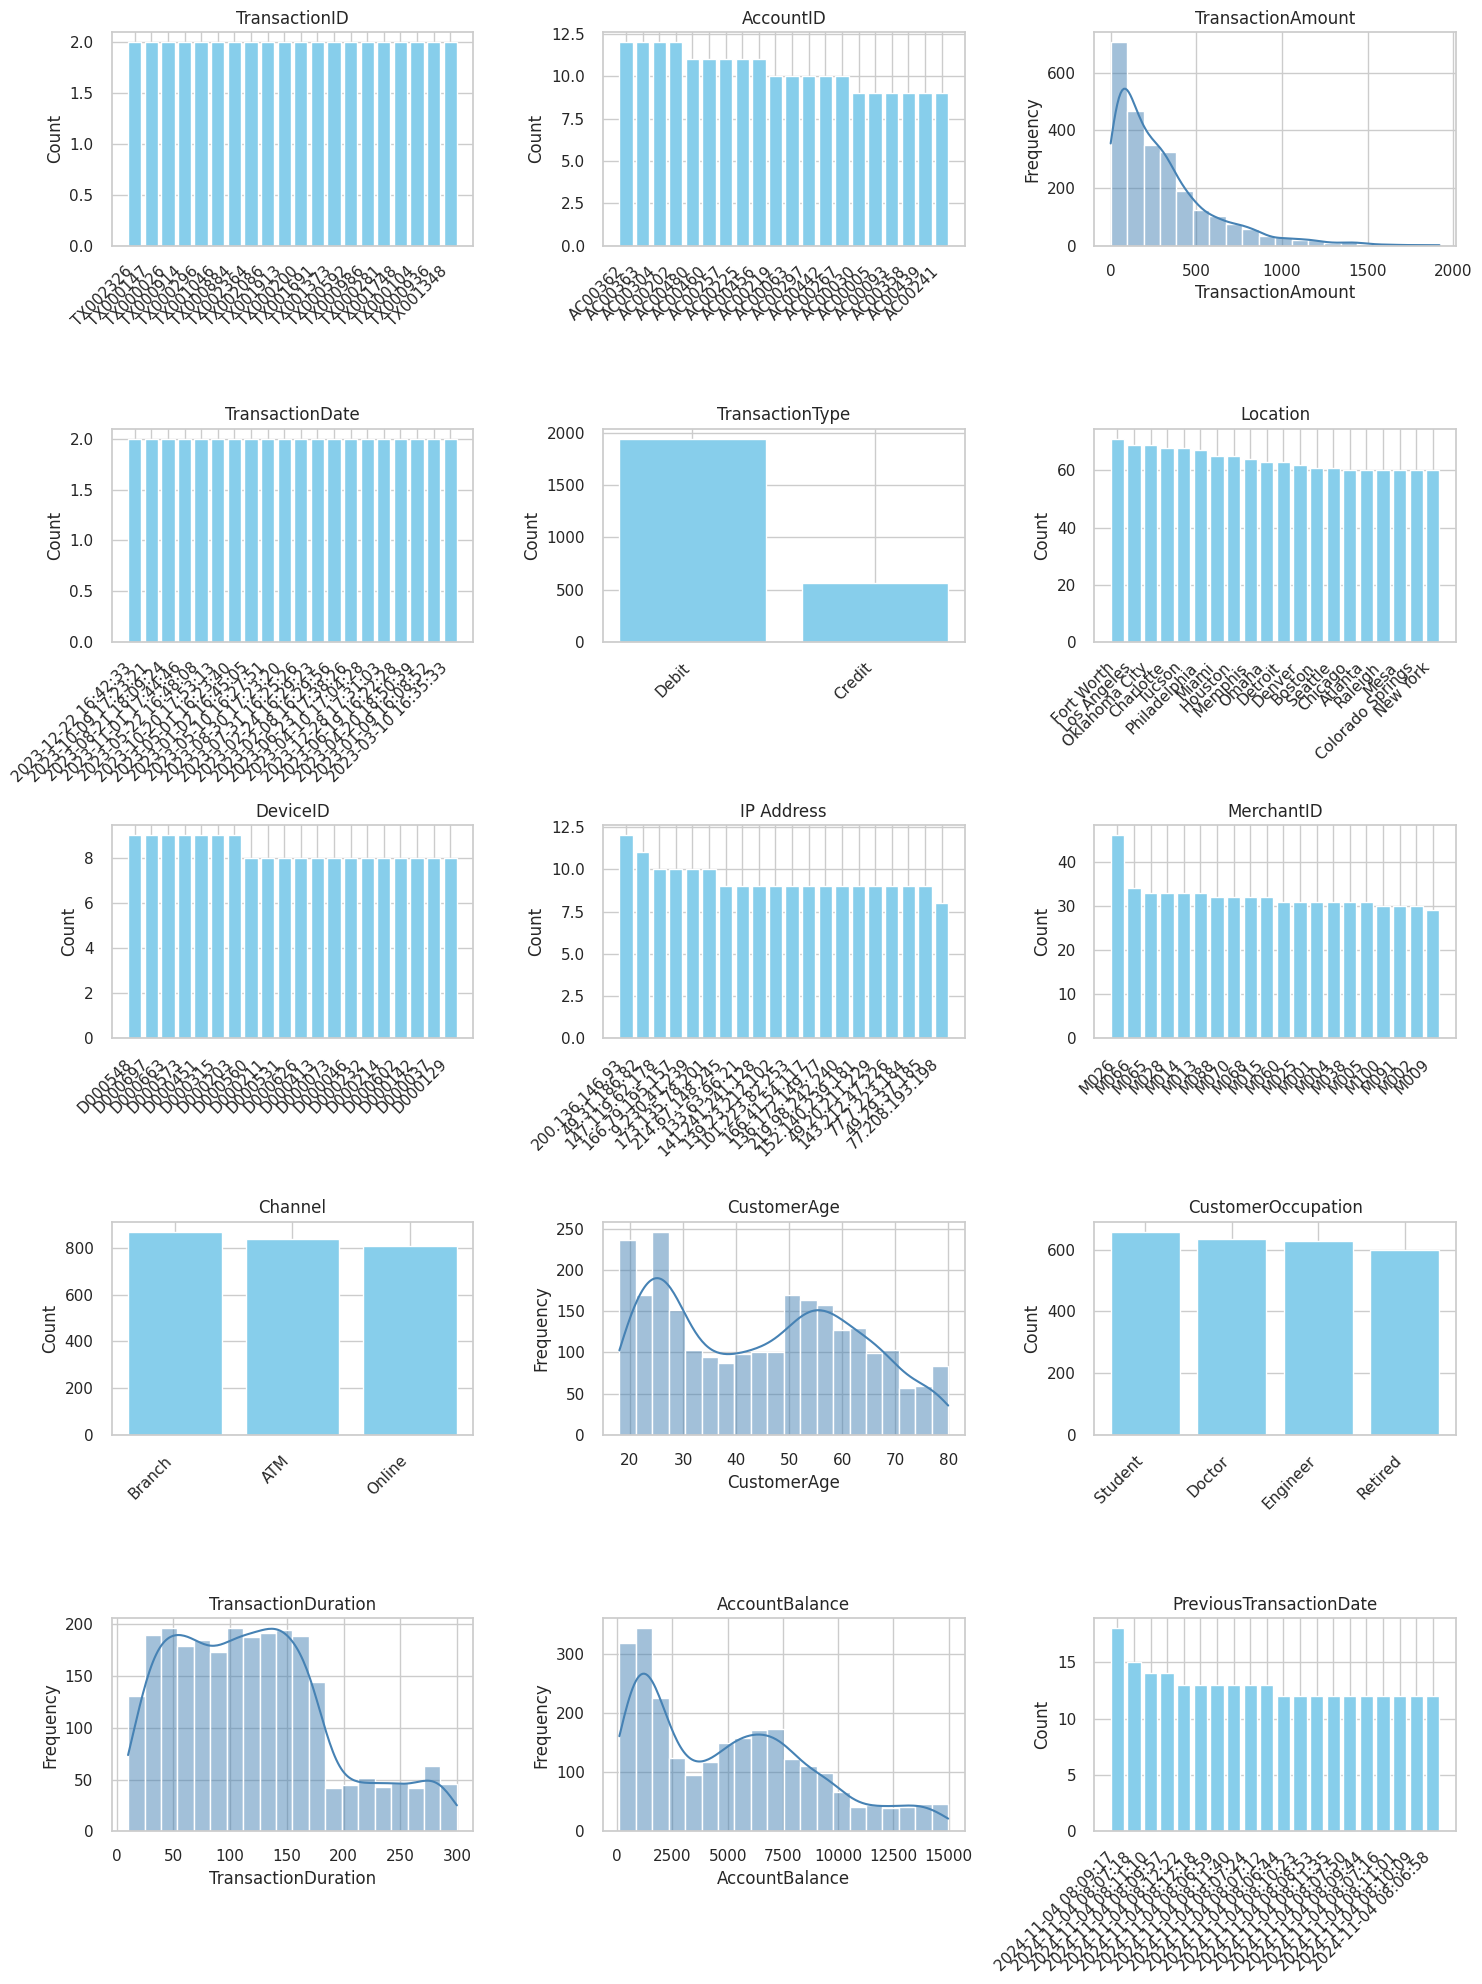

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Setting style visual
sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

# Load the dataset
df = pd.read_csv("/kaggle/input/bank-transctions-csv/bank_transactions_data_edited.csv")

# === TAMPILKAN HEAD DATASET ===
print("=== Head of Dataset ===")
display(df.fillna(0).head())

# Tampilkan statistik deskriptif hanya untuk kolom numerik
print("\n=== Statistik Deskriptif (kolom numerik) ===")
display(df.describe(include=[np.number]))

# Deskriptif statistik kolom numerik
print("\n=== Statistik Deskriptif (Kolom Numerik) ===")
display(df.describe(include=[np.number]))

# Deskriptif statistik kolom kategorikal
print("\n=== Statistik Deskriptif (Kolom Kategorikal) ===")
display(df.describe(include=['object']))

# === TAMPILKAN INFORMASI DATASET ===
print("\n=== Info Dataset ===")
df.info()

# === STATISTIK DESKRIPTIF ===
print("\n=== Statistik Deskriptif Dataset ===")
# Hindari warning dengan suppress dan hanya numerik
with np.errstate(invalid='ignore'):
    display(df.describe(include='all'))

# === MATRICS KORELASI (Numerik saja) ===
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Matriks Korelasi")
plt.tight_layout()
plt.show()

# Calculate and plot the correlation matrix
print("\n=== Correlation Matrix ===")
correlation_matrix = df.corr(numeric_only=True)  # Tambahkan numeric_only=True
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

def plot_histograms(df):
    cols = df.columns
    n_cols = 3
    n_rows = int(np.ceil(len(cols) / n_cols))

    plt.figure(figsize=(n_cols * 5, n_rows * 4))

    for i, col in enumerate(cols):
        plt.subplot(n_rows, n_cols, i + 1)
        series = df[col].replace([np.inf, -np.inf], np.nan)
        unique_vals = series.nunique(dropna=True)

        if series.dtype == 'object' or unique_vals < 20:
            # Barplot menggunakan matplotlib langsung
            value_counts = series.value_counts(dropna=True).nlargest(20)
            plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
            plt.xticks(rotation=45, ha='right')
            plt.ylabel('Count')
        else:
            # Drop NaN values before plotting
            sns.histplot(series.dropna(), bins=20, kde=True, color='steelblue')
            plt.ylabel('Frequency')

        plt.title(col)

    plt.tight_layout()
    plt.show()

# Replace inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# **Handle NaN values: Option 1: Remove rows with NaN**
# df.dropna(inplace=True)  # Remove rows with any NaN values

# **Handle NaN values: Option 2: Impute NaN values (e.g., with the mean)**
for col in df.columns:
    if df[col].isnull().any():  # Check if the column has any NaN values
        if pd.api.types.is_numeric_dtype(df[col]):  # Impute only numeric columns
            df[col].fillna(df[col].mean(), inplace=True)  # Replace NaN with the mean

# Kolom yang ingin dilewati
cols_to_skip = ['TransctionType', 'LoginAttempts', '']
# Plot
plot_histograms(df.drop(columns=cols_to_skip, errors='ignore'))


=== Head of Dataset ===


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,0.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39



=== Statistik Deskriptif (kolom numerik) ===


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000



=== Statistik Deskriptif (Kolom Numerik) ===


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000



=== Statistik Deskriptif (Kolom Kategorikal) ===


,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
count,2508,2516,2509,2507,2507,2507,2517,2514,2510,2514,2513
unique,2484,495,2485,2,43,681,591,100,3,4,360
top,TX002326,AC00362,2023-12-22 16:42:33,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,Student,2024-11-04 08:09:17
freq,2,12,2,1942,71,9,12,46,868,657,18



=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  Ac

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002326,AC00362,NaN,2023-12-22 16:42:33,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


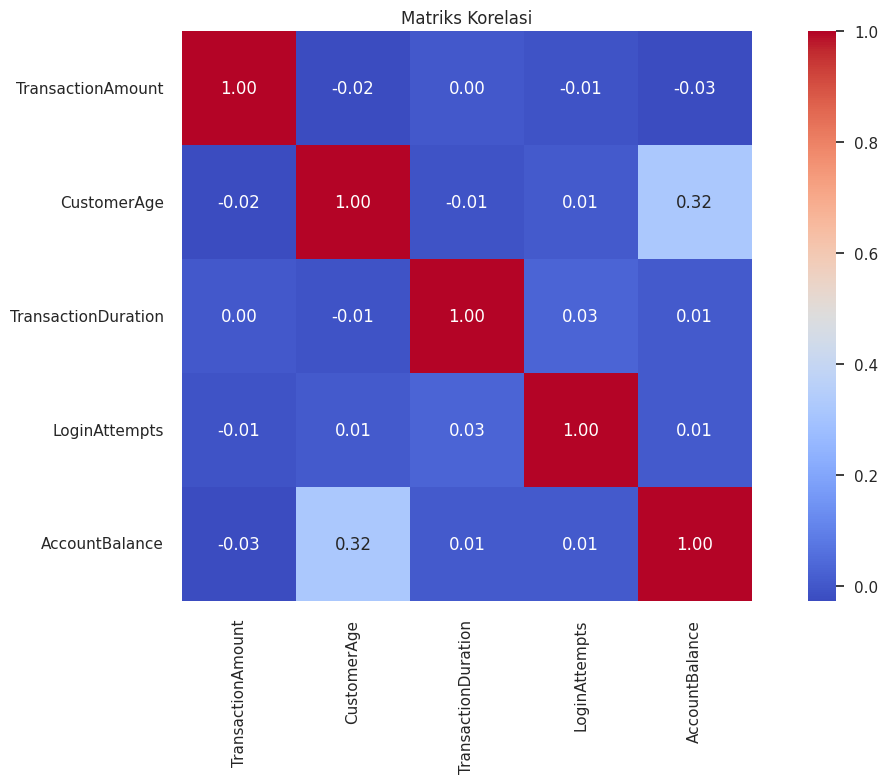


=== Correlation Matrix ===


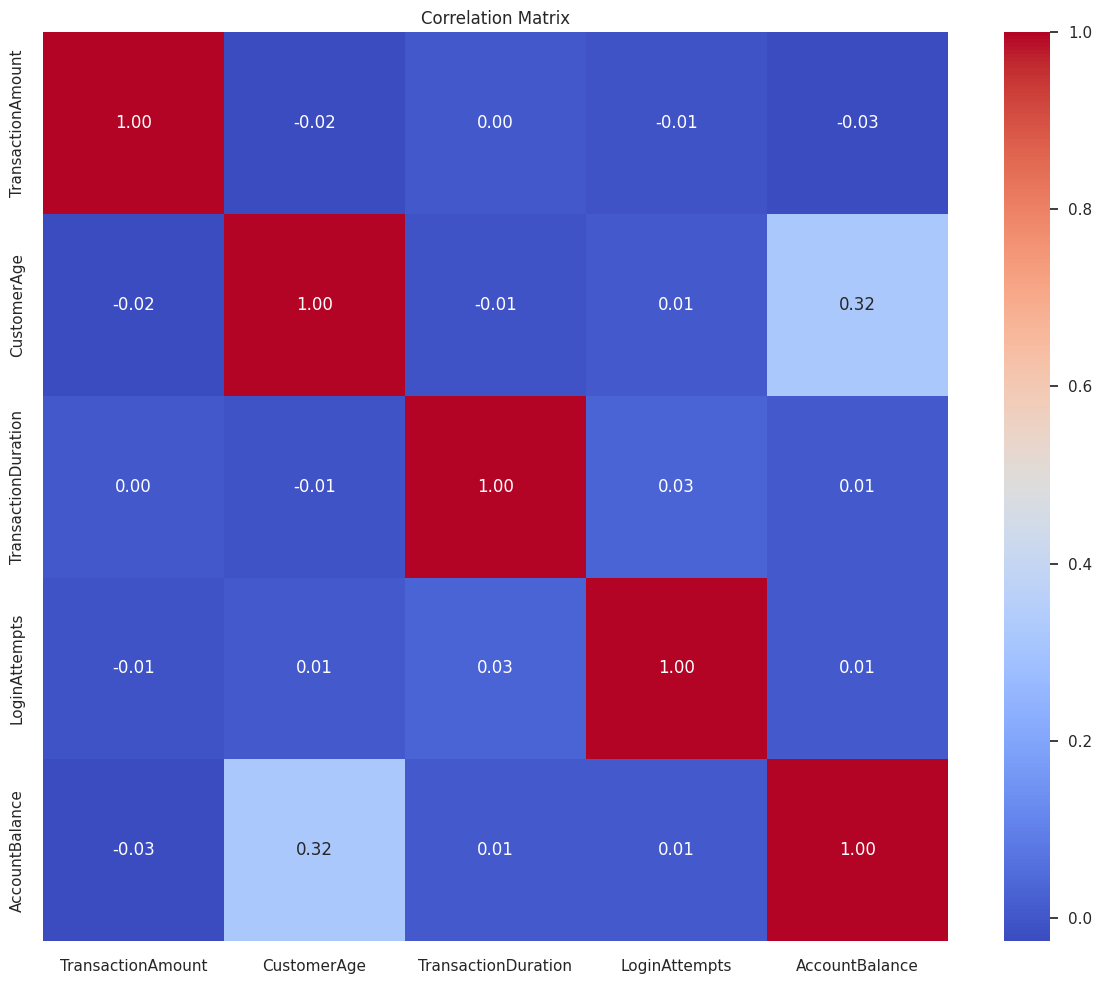

Number of NaN values after handling: 285


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

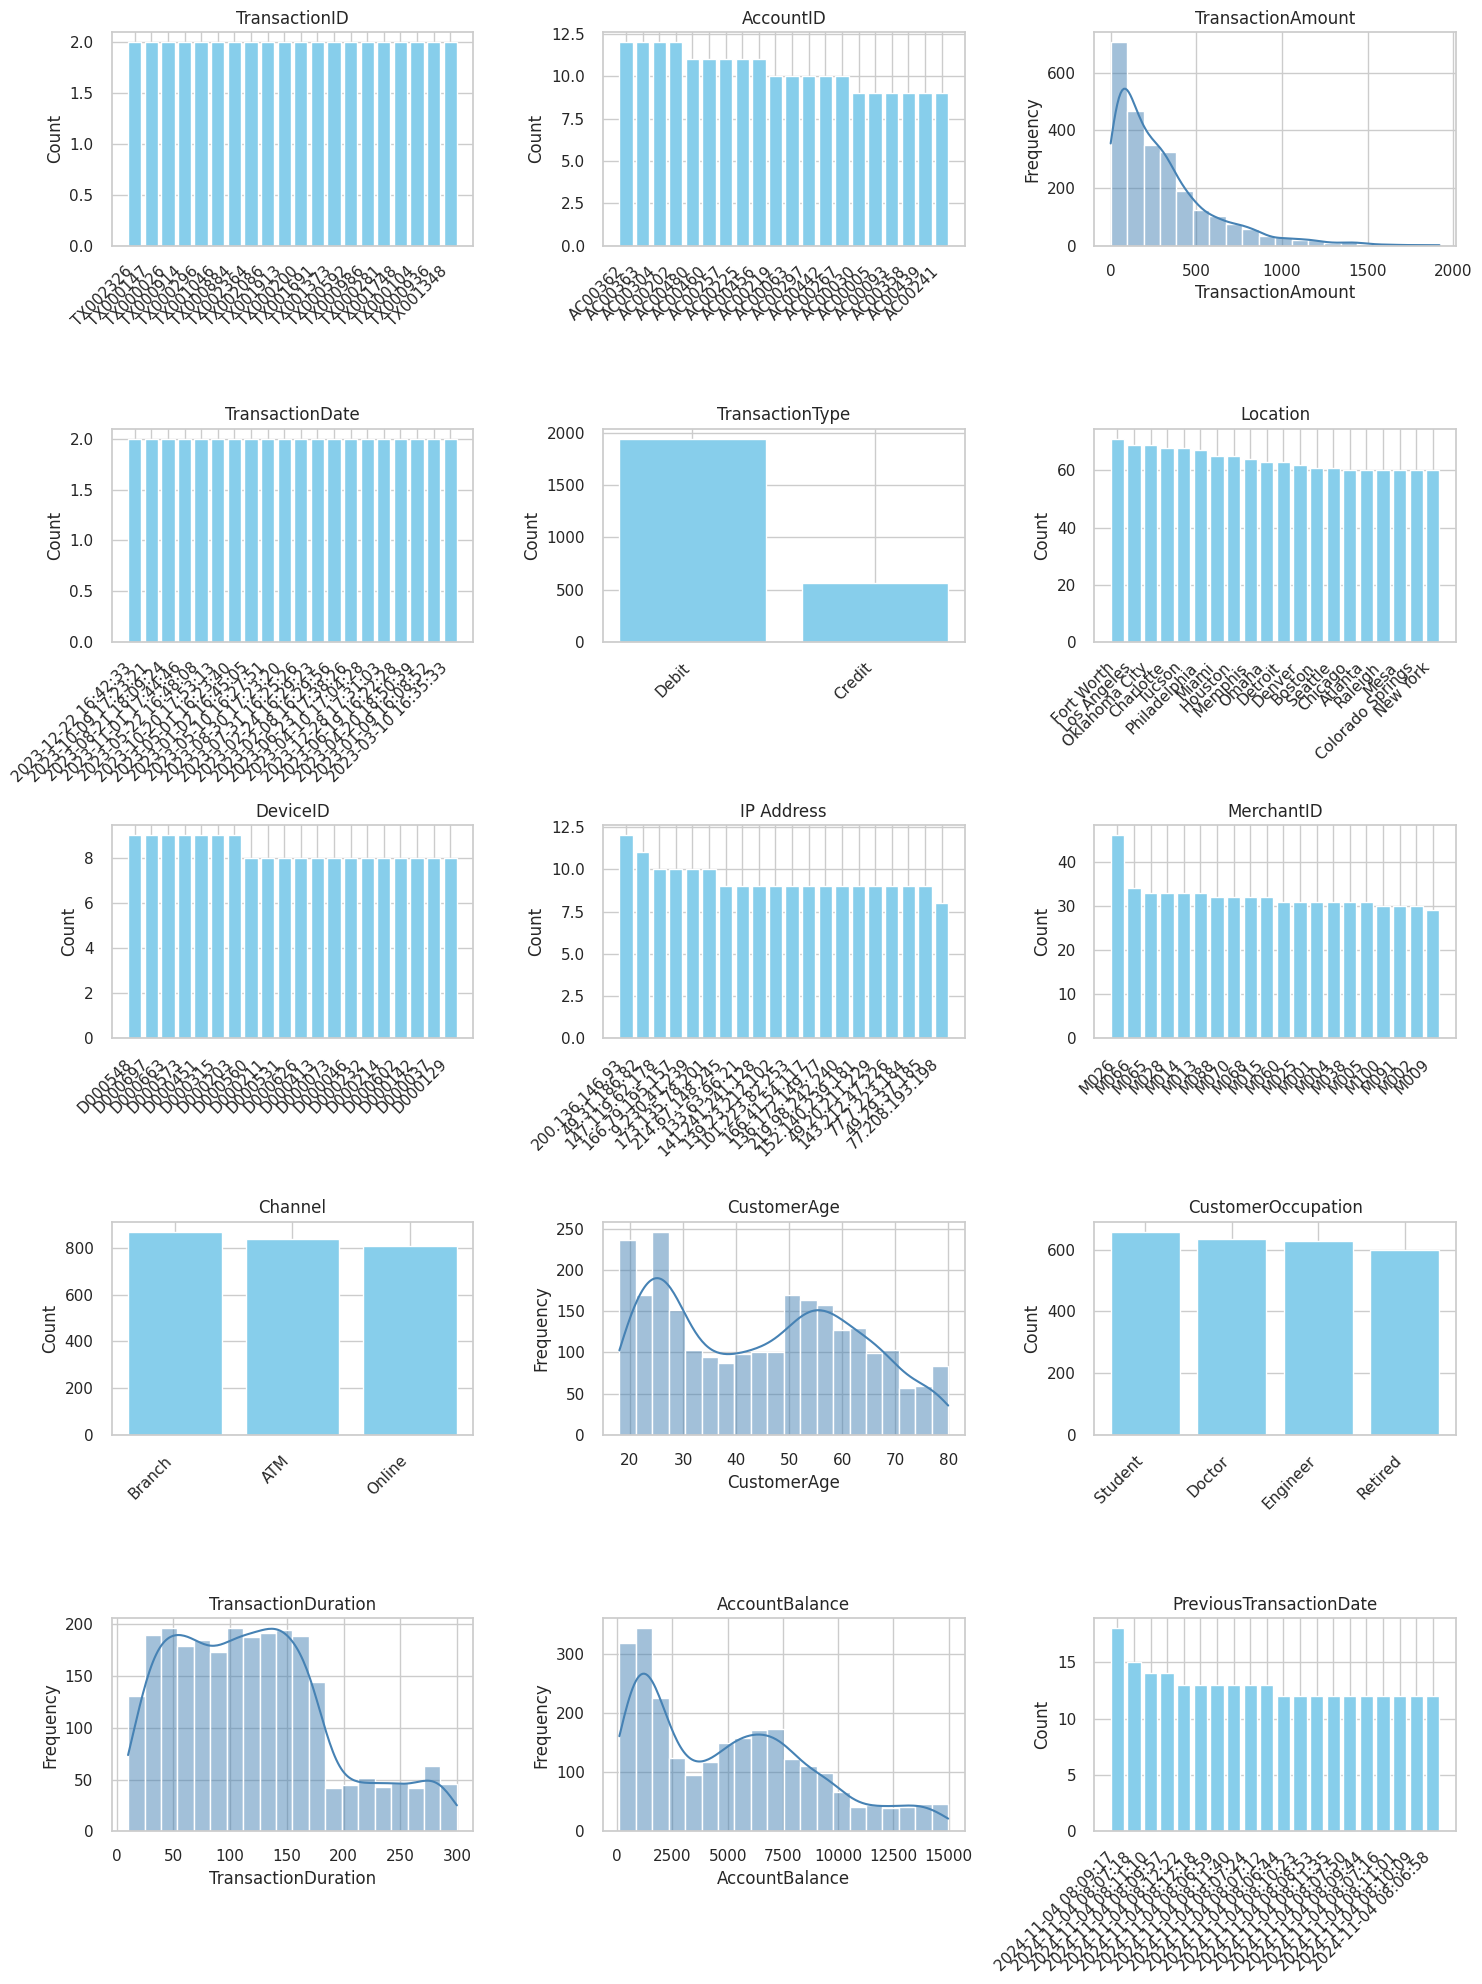

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Setting style visual
sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

# Load the dataset
df = pd.read_csv("/kaggle/input/bank-transctions-csv/bank_transactions_data_edited.csv")

# === TAMPILKAN HEAD DATASET ===
print("=== Head of Dataset ===")
display(df.fillna(0).head())

# Tampilkan statistik deskriptif hanya untuk kolom numerik
print("\n=== Statistik Deskriptif (kolom numerik) ===")
display(df.describe(include=[np.number]))

# Deskriptif statistik kolom numerik
print("\n=== Statistik Deskriptif (Kolom Numerik) ===")
display(df.describe(include=[np.number]))

# Deskriptif statistik kolom kategorikal
print("\n=== Statistik Deskriptif (Kolom Kategorikal) ===")
display(df.describe(include=['object']))

# === TAMPILKAN INFORMASI DATASET ===
print("\n=== Info Dataset ===")
df.info()

# === STATISTIK DESKRIPTIF ===
print("\n=== Statistik Deskriptif Dataset ===")
# Hindari warning dengan suppress dan hanya numerik
with np.errstate(invalid='ignore'):
    display(df.describe(include='all'))

# === MATRICS KORELASI (Numerik saja) ===
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Matriks Korelasi")
plt.tight_layout()
plt.show()

# Calculate and plot the correlation matrix
print("\n=== Correlation Matrix ===")
correlation_matrix = df.corr(numeric_only=True)  # Tambahkan numeric_only=True
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

def plot_histograms(df):
    cols = df.columns
    n_cols = 3
    n_rows = int(np.ceil(len(cols) / n_cols))

    plt.figure(figsize=(n_cols * 5, n_rows * 4))

    for i, col in enumerate(cols):
        plt.subplot(n_rows, n_cols, i + 1)
        series = df[col].replace([np.inf, -np.inf], np.nan)
        unique_vals = series.nunique(dropna=True)

        if series.dtype == 'object' or unique_vals < 20:
            # Barplot menggunakan matplotlib langsung
            value_counts = series.value_counts(dropna=True).nlargest(20)
            plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
            plt.xticks(rotation=45, ha='right')
            plt.ylabel('Count')
        else:
            # Drop NaN values before plotting
            sns.histplot(series.dropna(), bins=20, kde=True, color='steelblue')
            plt.ylabel('Frequency')

        plt.title(col)

    plt.tight_layout()
    plt.show()

# Replace inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# **Handle NaN values: Option 1: Remove rows with NaN**
# df.dropna(inplace=True)  # Remove rows with any NaN values

# **Handle NaN values: Option 2: Impute NaN values (e.g., with the mean)**
for col in df.columns:
    if df[col].isnull().any():  # Check if the column has any NaN values
        if pd.api.types.is_numeric_dtype(df[col]):  # Impute only numeric columns
            # Correct way to fill NaN values (Option 1)
            df.fillna({col: df[col].mean()}, inplace=True)
            # OR (Option 2)
            # df[col] = df[col].fillna(df[col].mean())

# **Important: Check for remaining NaN values after handling**
print("Number of NaN values after handling:", df.isnull().sum().sum())

# Kolom yang ingin dilewati
cols_to_skip = ['TransctionType', 'LoginAttempts', '']
# Plot
plot_histograms(df.drop(columns=cols_to_skip, errors='ignore'))


=== Head of Dataset ===


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,0.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39



=== Statistik Deskriptif (kolom numerik) ===


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000



=== Statistik Deskriptif (Kolom Numerik) ===


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000



=== Statistik Deskriptif (Kolom Kategorikal) ===


,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
count,2508,2516,2509,2507,2507,2507,2517,2514,2510,2514,2513
unique,2484,495,2485,2,43,681,591,100,3,4,360
top,TX002326,AC00362,2023-12-22 16:42:33,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,Student,2024-11-04 08:09:17
freq,2,12,2,1942,71,9,12,46,868,657,18



=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  Ac

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002326,AC00362,NaN,2023-12-22 16:42:33,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


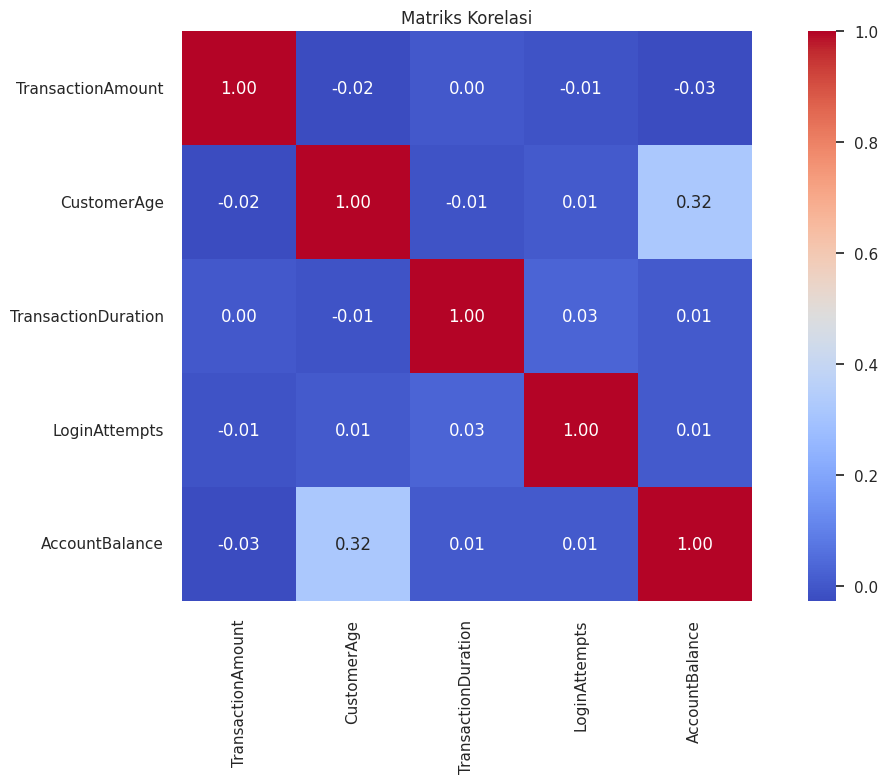


=== Correlation Matrix ===


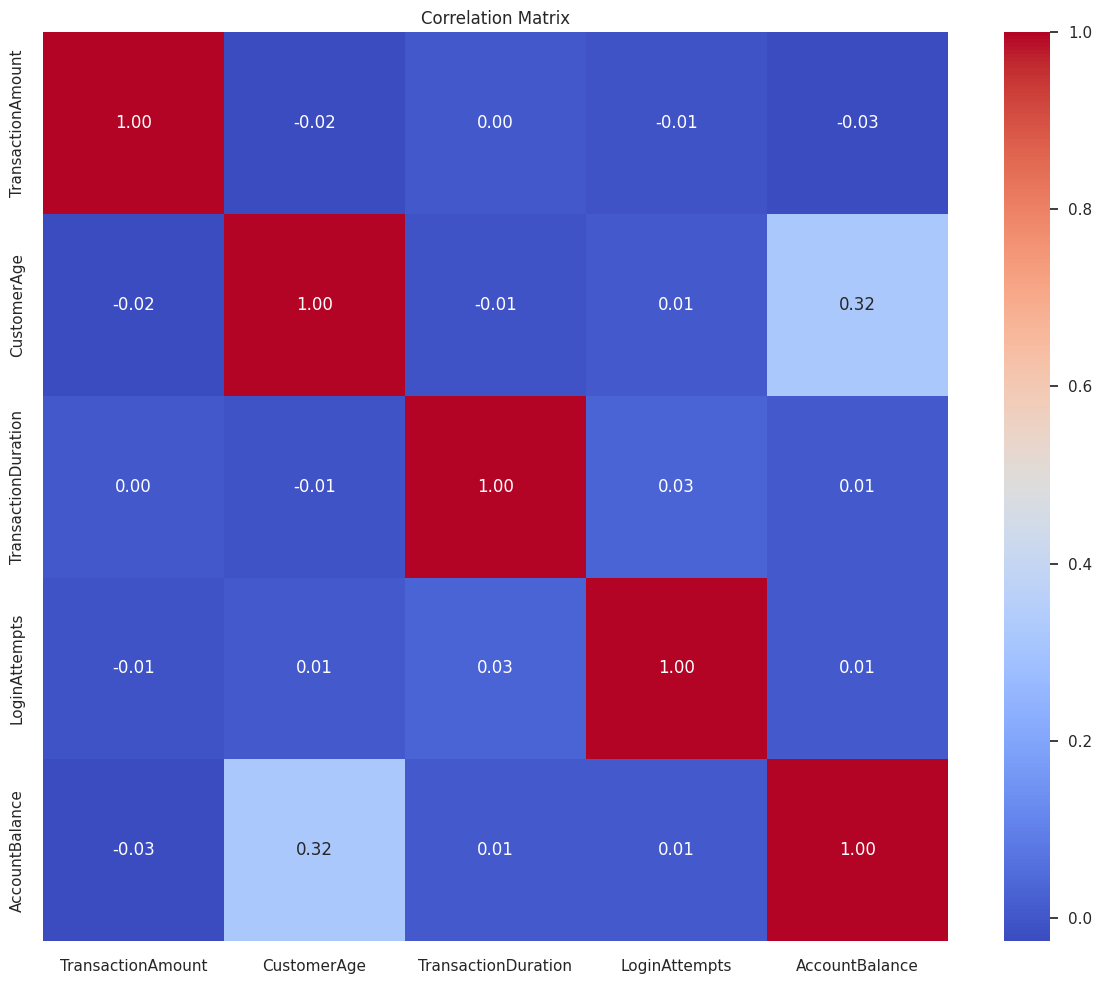

Number of NaN values after handling: 0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Setting style visual
sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

# Load the dataset
df = pd.read_csv("/kaggle/input/bank-transctions-csv/bank_transactions_data_edited.csv")

# === TAMPILKAN HEAD DATASET ===
print("=== Head of Dataset ===")
display(df.fillna(0).head())

# Tampilkan statistik deskriptif hanya untuk kolom numerik
print("\n=== Statistik Deskriptif (kolom numerik) ===")
display(df.describe(include=[np.number]))

# Deskriptif statistik kolom numerik
print("\n=== Statistik Deskriptif (Kolom Numerik) ===")
display(df.describe(include=[np.number]))

# Deskriptif statistik kolom kategorikal
print("\n=== Statistik Deskriptif (Kolom Kategorikal) ===")
display(df.describe(include=['object']))

# === TAMPILKAN INFORMASI DATASET ===
print("\n=== Info Dataset ===")
df.info()

# === STATISTIK DESKRIPTIF ===
print("\n=== Statistik Deskriptif Dataset ===")
# Hindari warning dengan suppress dan hanya numerik
with np.errstate(invalid='ignore'):
    display(df.describe(include='all'))

# === MATRICS KORELASI (Numerik saja) ===
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Matriks Korelasi")
plt.tight_layout()
plt.show()

# Calculate and plot the correlation matrix
print("\n=== Correlation Matrix ===")
correlation_matrix = df.corr(numeric_only=True)  # Tambahkan numeric_only=True
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

def plot_histograms(df):
    cols = df.columns
    n_cols = 3
    n_rows = int(np.ceil(len(cols) / n_cols))

    plt.figure(figsize=(n_cols * 5, n_rows * 4))

    for i, col in enumerate(cols):
        plt.subplot(n_rows, n_cols, i + 1)
        series = df[col].replace([np.inf, -np.inf], np.nan)
        unique_vals = series.nunique(dropna=True)

        if series.dtype == 'object' or unique_vals < 20:
            # Barplot menggunakan matplotlib langsung
            value_counts = series.value_counts(dropna=True).nlargest(20)
            plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
            plt.xticks(rotation=45, ha='right')
            plt.ylabel('Count')
        else:
            # Drop NaN values before plotting
            sns.histplot(series.dropna(), bins=20, kde=True, color='steelblue')
            plt.ylabel('Frequency')

        plt.title(col)

    plt.tight_layout()
    plt.show()

# Replace inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# **Handle NaN values comprehensively**
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            # Impute numeric columns with the mean, handling potential errors
            try:
                df.fillna({col: df[col].mean()}, inplace=True)
            except Exception as e:
                print(f"Error imputing column {col}: {e}")
                # You might want to handle the error differently, e.g., impute with median
        else:
            # Impute non-numeric columns with the most frequent value
            try:
                df.fillna({col: df[col].mode()[0]}, inplace=True)  # Use mode for non-numeric
            except Exception as e:
                print(f"Error imputing column {col}: {e}")
                # Handle the error as appropriate

# **Important: Check for remaining NaN values after handling**
print("Number of NaN values after handling:", df.isnull().sum().sum())

# **Reset Seaborn (try this)**
sns.reset_orig()
sns.set(style="whitegrid")

# **Suppress the warning (use with caution, only if everything else fails)**
warnings.filterwarnings("ignore", category=FutureWarning)

# Kolom yang ingin dilewati
cols_to_skip = ['TransctionType', 'LoginAttempts', '']
# Plot
plot_histograms(df.drop(columns=cols_to_skip, errors='ignore'))


# 3. EXPLORASI DATA

In [78]:
import pandas as pd

# Baca file CSV
df = pd.read_csv("/kaggle/input/bank-transctions-csv/bank_transactions_data_edited.csv")

# Cek kolom yang mestinya numerik dan konversi dengan coercion untuk menghindari nilai invalid
numerical_cols = [
    'TransactionAmount', 'CustomerAge', 'TransactionDuration',
    'LoginAttempts', 'AccountBalance'
]

for col in numerical_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Tangani nilai NaN dengan mengisi atau menghapus
# Mengisi NaN numerik dengan 0 agar warning hilang dan data bisa tampil
df.fillna({
    'TransactionAmount': 0,
    'CustomerAge': 0,
    'TransactionDuration': 0,
    'LoginAttempts': 0,
    'AccountBalance': 0
}, inplace=True)

# Jika masih ada NaN di kolom lain yang mungkin bukan numerik, bisa di-drop atau diisi kosong string
df.fillna('', inplace=True)

# Tampilkan 5 baris pertama
print("== 5 Data Teratas ==")

try:
    from IPython.display import display
    display(df.head())
except ImportError:
    print(df.head())

== 5 Data Teratas ==


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,0.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [79]:
# 2. Menampilkan info dataset
print("\n== Informasi Dataset ==")
df.info()


== Informasi Dataset ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2537 non-null   object 
 1   AccountID                2537 non-null   object 
 2   TransactionAmount        2537 non-null   float64
 3   TransactionDate          2537 non-null   object 
 4   TransactionType          2537 non-null   object 
 5   Location                 2537 non-null   object 
 6   DeviceID                 2537 non-null   object 
 7   IP Address               2537 non-null   object 
 8   MerchantID               2537 non-null   object 
 9   Channel                  2537 non-null   object 
 10  CustomerAge              2537 non-null   float64
 11  CustomerOccupation       2537 non-null   object 
 12  TransactionDuration      2537 non-null   float64
 13  LoginAttempts            2537 non-null   float64
 14 

In [80]:
# 3. Statistik deskriptif
print("\n== Statistik Deskriptif Numerik ==")
display(df.describe())  


== Statistik Deskriptif Numerik ==


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000
mean,294.605987,44.361451,118.199054,1.112337,5059.018404
std,292.270584,18.165376,70.748623,0.600665,3912.526890
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.930000,27.000000,61.000000,1.000000,1454.080000
50%,207.710000,45.000000,111.000000,1.000000,4671.690000
75%,409.610000,59.000000,161.000000,1.000000,7627.040000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [81]:
# === SKILLED LEVEL ===

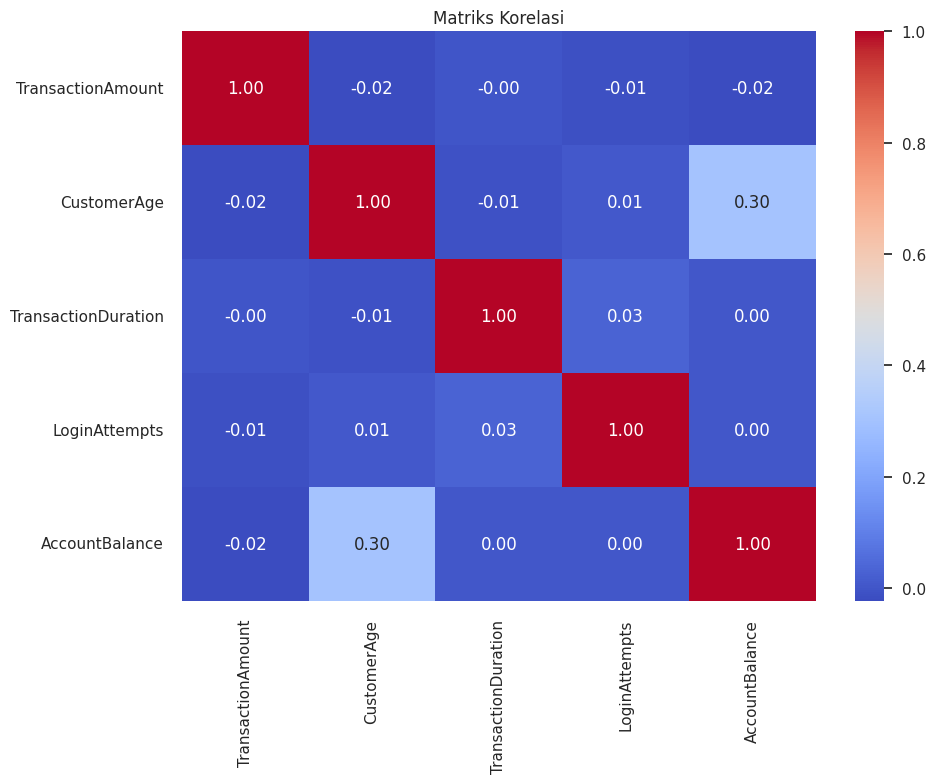

In [82]:
# 4. Matriks Korelasi (khusus kolom numerik)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.tight_layout()
plt.show()

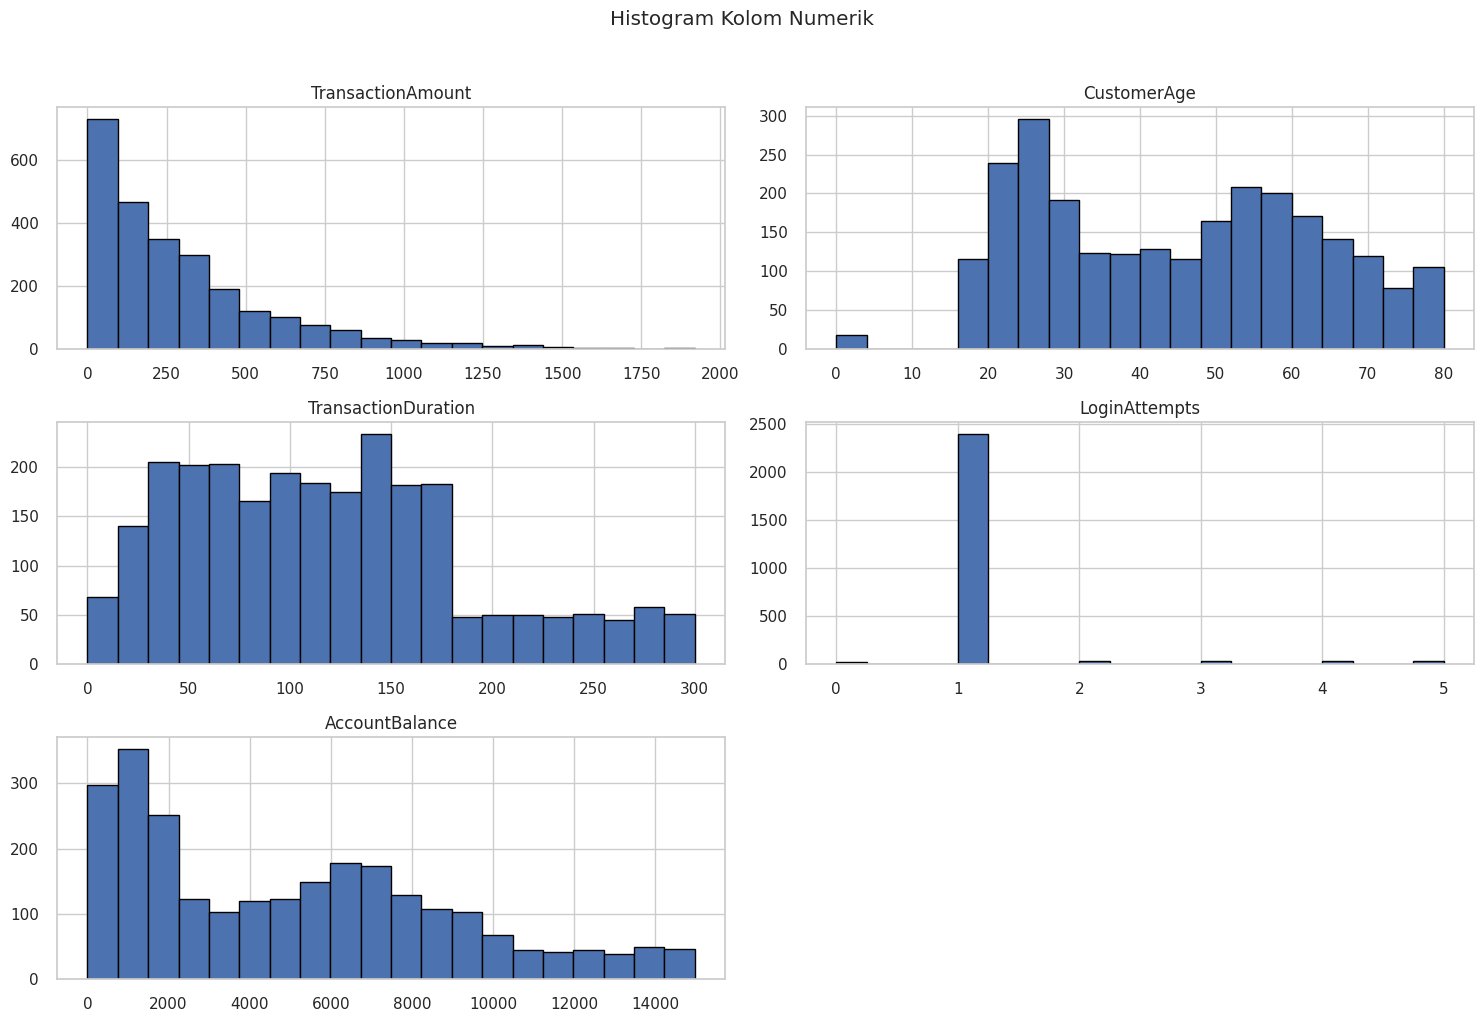

In [83]:
# 5. Histogram kolom numerik
df.select_dtypes(include=['int64', 'float64']).hist(
    figsize=(15, 10), bins=20, edgecolor='black'
)
plt.suptitle("Histogram Kolom Numerik", y=1.02)
plt.tight_layout()
plt.show()

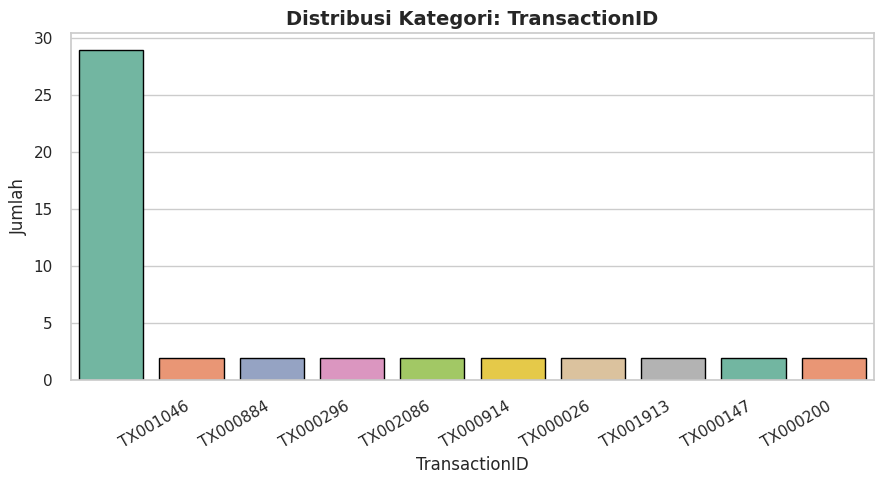

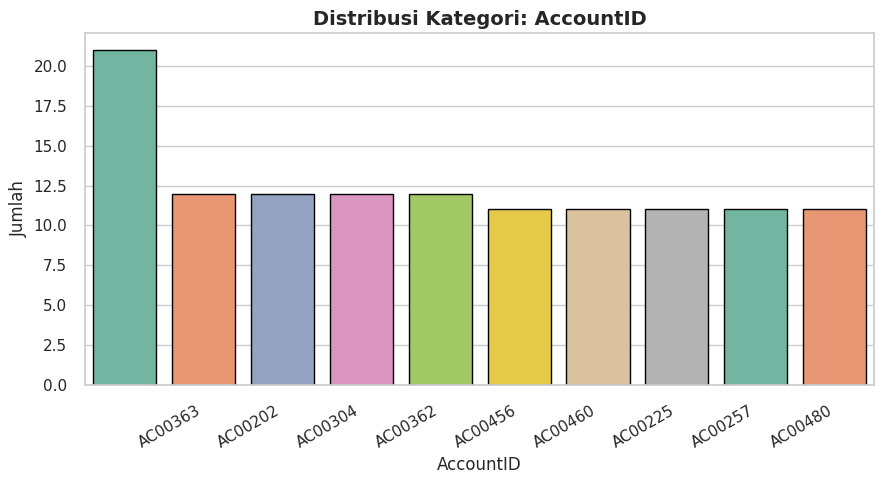

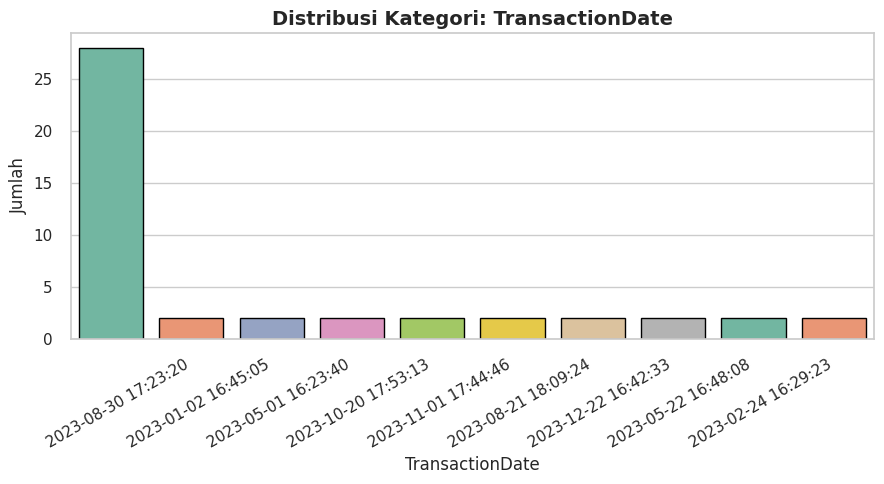

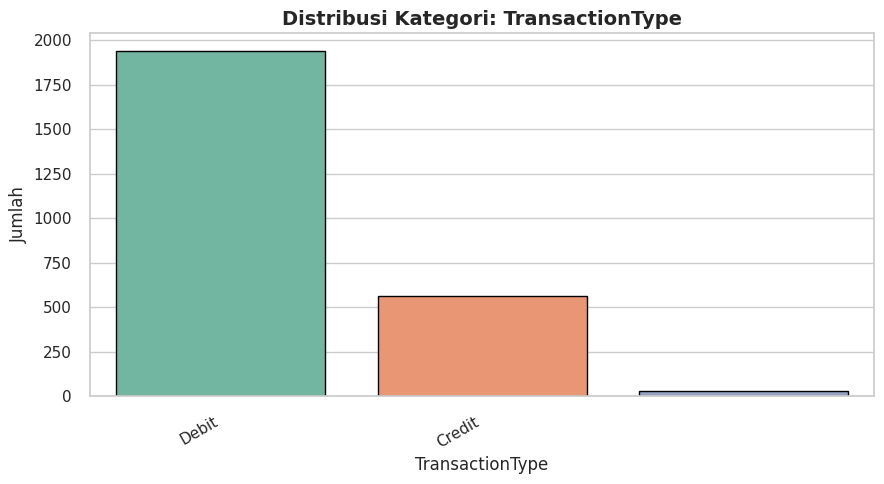

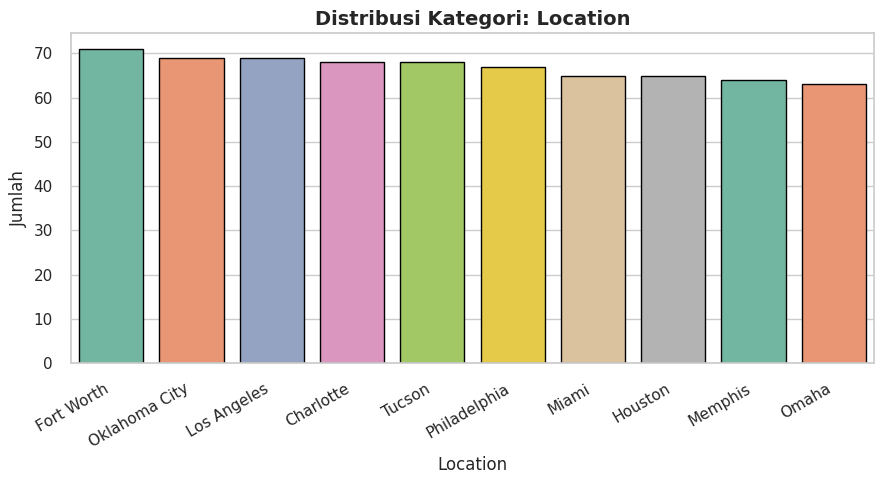

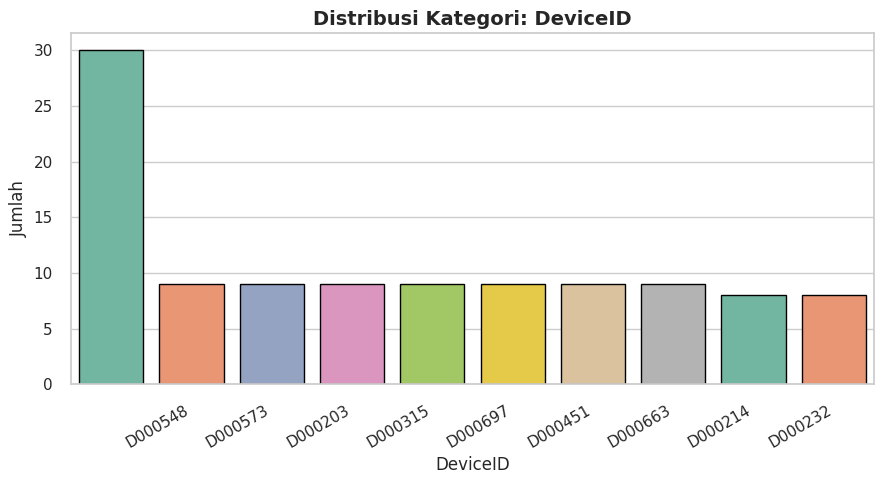

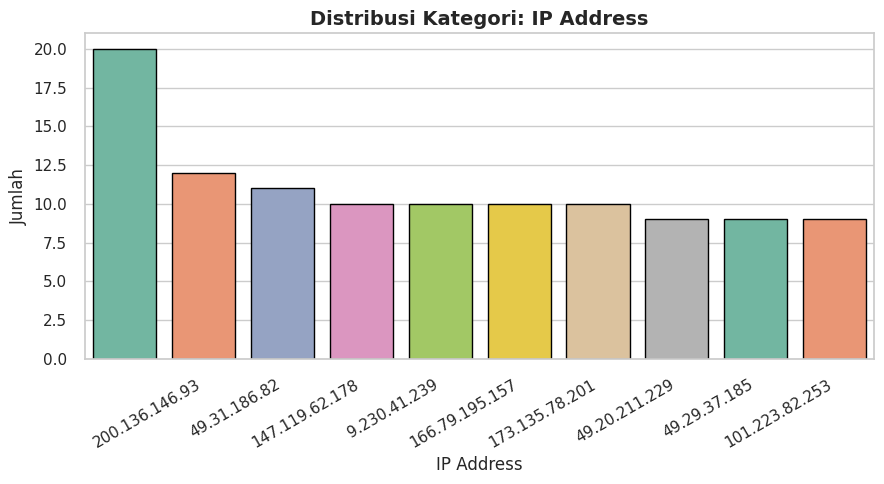

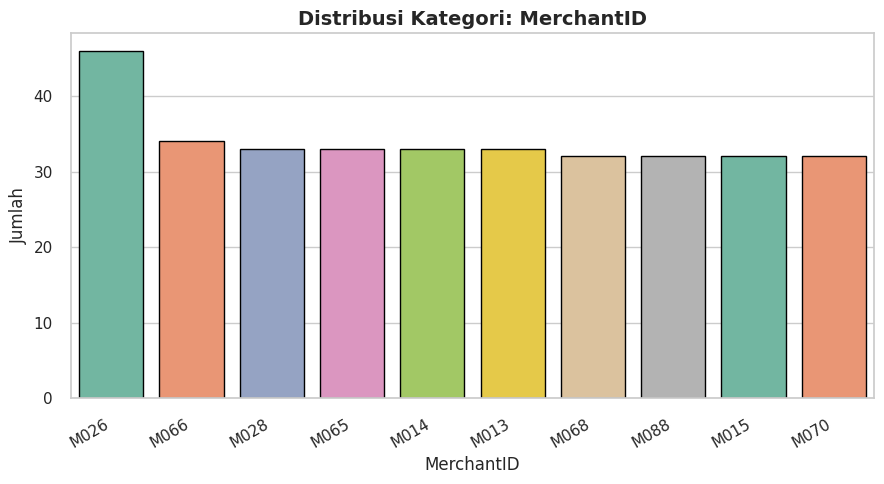

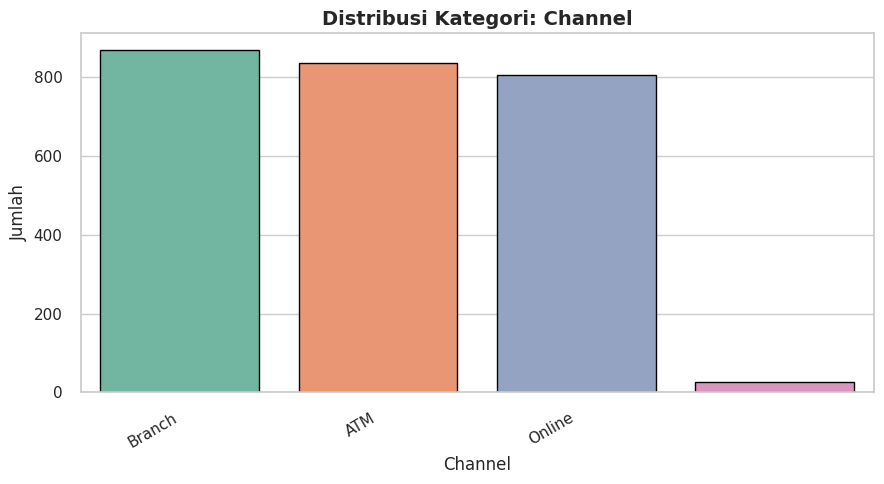

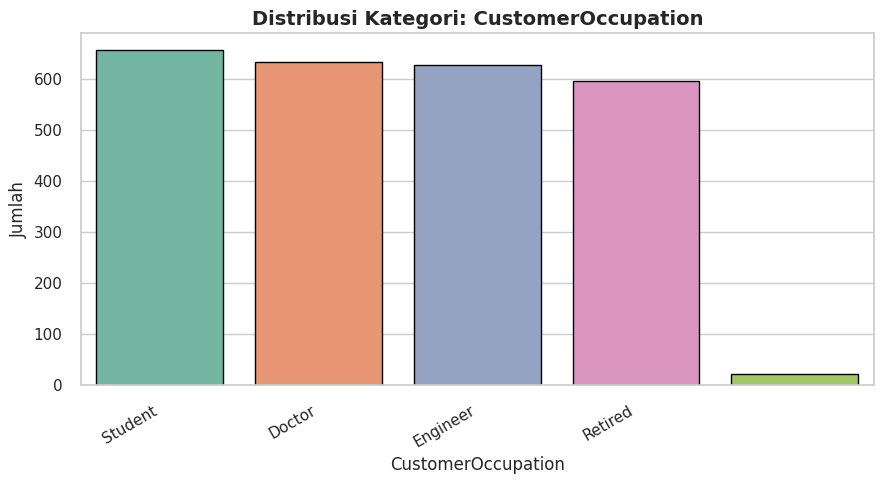

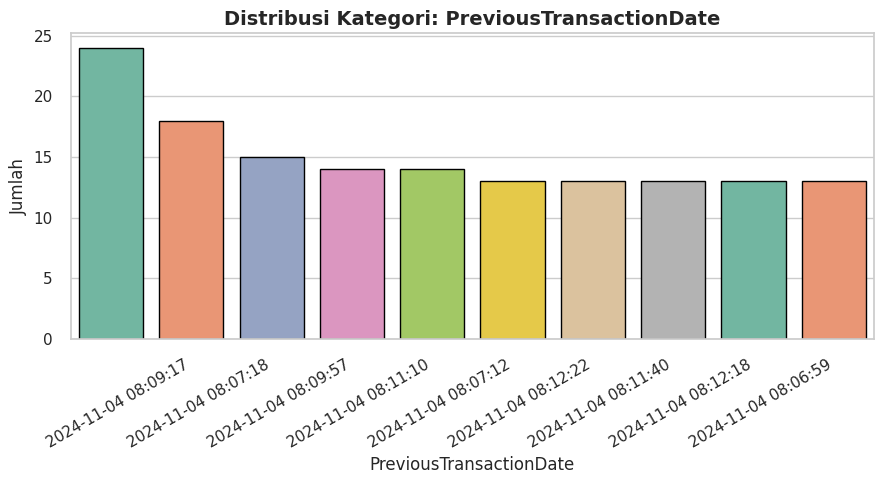

In [84]:
# 6. Histogram kolom kategorikal
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    plt.figure(figsize=(9, 5))
    order = df[col].value_counts().index[:10]  # batasi ke 10 kategori teratas
    sns.countplot(data=df, x=col, order=order, palette="Set2", edgecolor='black')
    plt.title(f'Distribusi Kategori: {col}', fontsize=14, weight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=30, ha='right')  # cegah overlap
    plt.tight_layout()
    plt.show()

# 4. PEMBERSIHAN DATASET

In [85]:
# 1. Cek missing dan duplikat (Basic)
print("Missing values per column:\n", df.isnull().sum())
print("Jumlah duplikat:", df.duplicated().sum())

Missing values per column:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64
Jumlah duplikat: 21


In [86]:
# 2. Drop duplikat 
df.drop_duplicates(inplace=True)

In [87]:
# 3. Drop kolom ID 
id_columns = ['TransactionID', 'AccountID', 'DeviceID', 'IPAddress', 'MerchantID']
df.drop(columns=[col for col in id_columns if col in df.columns], inplace=True)

In [88]:
# 4. Tangani kolom datetime: ekstrak fitur waktu lalu drop kolom aslinya
# Cek kolom yang ada
print("Kolom di df:", df.columns.tolist())

Kolom di df: ['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'IP Address', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']


In [89]:
# Tentukan ulang datetime_cols setelah pastikan kolom ada
datetime_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
print("Datetime columns ditemukan:", datetime_cols)

for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    df[col + '_hour'] = df[col].dt.hour.fillna(-1).astype(int)
    df[col + '_dayofweek'] = df[col].dt.dayofweek.fillna(-1).astype(int)
    df[col + '_is_weekend'] = (df[col].dt.dayofweek.fillna(-1) >= 5).astype(int)
    df.drop(columns=[col], inplace=True)

Datetime columns ditemukan: ['TransactionDate', 'PreviousTransactionDate']


In [90]:
# Pastikan cek kolom di DataFrame
print("Kolom sebelum ekstrak datetime:", df.columns.tolist())

Kolom sebelum ekstrak datetime: ['TransactionAmount', 'TransactionType', 'Location', 'IP Address', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionDate_hour', 'TransactionDate_dayofweek', 'TransactionDate_is_weekend', 'PreviousTransactionDate_hour', 'PreviousTransactionDate_dayofweek', 'PreviousTransactionDate_is_weekend']


In [91]:
datetime_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
print("Kolom datetime yang akan diolah:", datetime_cols)

new_cols = []  # untuk menyimpan DataFrame sementara kolom hasil ekstrak

for col in datetime_cols:
    dt_col = pd.to_datetime(df[col], errors='coerce')
    temp_df = pd.DataFrame({
        col + '_hour': dt_col.dt.hour.fillna(-1).astype(int),
        col + '_dayofweek': dt_col.dt.dayofweek.fillna(-1).astype(int),
        col + '_is_weekend': (dt_col.dt.dayofweek.fillna(-1) >= 5).astype(int)
    })
    new_cols.append(temp_df)

# Gabungkan semua kolom hasil ekstraksi sekaligus
df = pd.concat([df] + new_cols, axis=1)

# Drop kolom datetime asli setelah ekstraksi fitur
df.drop(columns=datetime_cols, inplace=True)

print("Kolom setelah ekstrak datetime:", df.columns.tolist())

Kolom datetime yang akan diolah: ['TransactionDate_hour', 'TransactionDate_dayofweek', 'TransactionDate_is_weekend', 'PreviousTransactionDate_hour', 'PreviousTransactionDate_dayofweek', 'PreviousTransactionDate_is_weekend']
Kolom setelah ekstrak datetime: ['TransactionAmount', 'TransactionType', 'Location', 'IP Address', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionDate_hour_hour', 'TransactionDate_hour_dayofweek', 'TransactionDate_hour_is_weekend', 'TransactionDate_dayofweek_hour', 'TransactionDate_dayofweek_dayofweek', 'TransactionDate_dayofweek_is_weekend', 'TransactionDate_is_weekend_hour', 'TransactionDate_is_weekend_dayofweek', 'TransactionDate_is_weekend_is_weekend', 'PreviousTransactionDate_hour_hour', 'PreviousTransactionDate_hour_dayofweek', 'PreviousTransactionDate_hour_is_weekend', 'PreviousTransactionDate_dayofweek_hour', 'PreviousTransactionDate_dayofweek_dayofweek', 'PreviousTransactionDate_dayofwee

In [92]:
# --- 5. Imputasi missing values ---
cat_cols = df.select_dtypes(include=['object', 'category']).columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Imputasi untuk kategorikal dengan modus
for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

# Imputasi untuk numerik dengan mean
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [93]:
# --- 6. Label Encoding fitur kategorikal ---
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [94]:
# 7. Feature Scaling (Advanced)
num_cols = df.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [95]:
# 8. Handling Outlier (Advanced)
# Update list kolom numerik berdasarkan df terbaru
num_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns]
print("Numerical columns untuk deteksi outlier:", num_cols)

# Handling outlier pakai IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    before = df.shape[0]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    after = df.shape[0]
    print(f"Outlier removed in {col}: {before - after} rows")

Numerical columns untuk deteksi outlier: ['TransactionAmount', 'TransactionType', 'Location', 'IP Address', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionDate_hour_hour', 'TransactionDate_hour_dayofweek', 'TransactionDate_hour_is_weekend', 'TransactionDate_dayofweek_hour', 'TransactionDate_dayofweek_dayofweek', 'TransactionDate_dayofweek_is_weekend', 'TransactionDate_is_weekend_hour', 'TransactionDate_is_weekend_dayofweek', 'TransactionDate_is_weekend_is_weekend', 'PreviousTransactionDate_hour_hour', 'PreviousTransactionDate_hour_dayofweek', 'PreviousTransactionDate_hour_is_weekend', 'PreviousTransactionDate_dayofweek_hour', 'PreviousTransactionDate_dayofweek_dayofweek', 'PreviousTransactionDate_dayofweek_is_weekend', 'PreviousTransactionDate_is_weekend_hour', 'PreviousTransactionDate_is_weekend_dayofweek', 'PreviousTransactionDate_is_weekend_is_weekend']
Outlier removed in TransactionAmount: 112 rows
Outlier remov

In [96]:
# 9. Binning data (Advanced)
if 'Amount' in df.columns:
    bins = [0, 0.2, 0.5, 0.7, 1.0]
    labels = ['Very Low', 'Low', 'Medium', 'High']
    df['Amount_binned'] = pd.cut(df['Amount'], bins=bins, labels=labels)
    
    # Encode hasil binning
    le_bin = LabelEncoder()
    df['Amount_binned_encoded'] = le_bin.fit_transform(df['Amount_binned'].astype(str))
    df.drop(columns=['Amount_binned'], inplace=True)

print("Data shape after cleaning:", df.shape)

Data shape after cleaning: (1695, 28)


# 5. Pra Pemrosesan Data

In [97]:
# 1. Label Encoding untuk kolom kategorikal
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [98]:
# 2. Feature Scaling untuk kolom numerik
num_cols = df.select_dtypes(include=[float, int]).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [99]:
print("Data setelah pra pemrosesan:")
display(df.head())

Data setelah pra pemrosesan:


,TransactionAmount,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,...,TransactionDate_is_weekend_is_weekend,PreviousTransactionDate_hour_hour,PreviousTransactionDate_hour_dayofweek,PreviousTransactionDate_hour_is_weekend,PreviousTransactionDate_dayofweek_hour,PreviousTransactionDate_dayofweek_dayofweek,PreviousTransactionDate_dayofweek_is_weekend,PreviousTransactionDate_is_weekend_hour,PreviousTransactionDate_is_weekend_dayofweek,PreviousTransactionDate_is_weekend_is_weekend
0,-1.090879,0.0,1.226618,-0.635850,-1.057073,1.436870,-1.294166,-0.518830,5.551115e-17,0.018891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.603759,0.0,-0.467526,-1.253579,-1.057073,1.326146,-1.294166,0.322704,5.551115e-17,2.263089,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.565852,0.0,0.177863,0.290744,1.338299,-1.386603,1.311073,-0.869470,5.551115e-17,-1.016652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.293466,0.0,0.984598,0.041277,1.338299,-0.999068,1.311073,-1.304263,5.551115e-17,0.916095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.725606,0.0,0.581230,-1.384252,-1.057073,-1.441965,1.311073,0.757497,5.551115e-17,-1.105071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6. MENENTUKAN JUMLAH CLUSTER

In [100]:
# 1. Menentukan filter
features = df.select_dtypes(include=[np.number]) 
embedding = features.values 

# 2. Normalisasi data
scaler = StandardScaler()
embedding = scaler.fit_transform(embedding)

# 3. Menentukan jumlah cluster dengan Silhouette Score & Davies-Bouldin Index
sil_scores = []
db_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(embedding)
    
    sil = silhouette_score(embedding, clusters)
    db = davies_bouldin_score(embedding, clusters)
    
    sil_scores.append(sil)
    db_scores.append(db)
    
    print(f"k={k}: Silhouette={sil:.4f}, Davies-Bouldin={db:.4f}")

# Menentukan optimal k berdasarkan Silhouette Score
optimal_k = k_values[np.argmax(sil_scores)]
print(f"Optimal k berdasarkan Silhouette Score: {optimal_k}")


k=2: Silhouette=0.1879, Davies-Bouldin=1.8315
k=3: Silhouette=0.1402, Davies-Bouldin=2.4072
k=4: Silhouette=0.1299, Davies-Bouldin=2.1780
k=5: Silhouette=0.1307, Davies-Bouldin=2.0056
k=6: Silhouette=0.1282, Davies-Bouldin=1.9040
k=7: Silhouette=0.1216, Davies-Bouldin=2.0104
k=8: Silhouette=0.1223, Davies-Bouldin=1.9613
k=9: Silhouette=0.1180, Davies-Bouldin=1.8949
Optimal k berdasarkan Silhouette Score: 2


# 7. MEMBANGUN MODEL CLUSTER

In [101]:
X = df.copy()

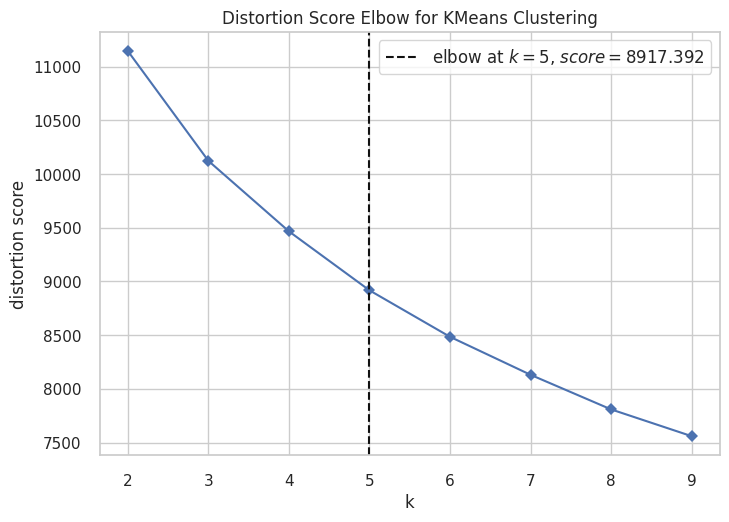

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [102]:
# 1. Elbow Method dengan KElbowVisualizer untuk menentukan jumlah cluster optimal
# Buat model KMeans dengan n_init eksplisit 
model = KMeans(random_state=42, n_init=10)

# Inisiasi visualizer dengan rentang jumlah cluster yang ingin diuji (2 sampai 10)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion', timings=False)

# Fit visualizer ke data
visualizer.fit(X)

# Tampilkan plot elbow method
visualizer.show()

In [103]:
# 2. Tentukan jumlah cluster terbaik dari visualisasi (misal optimal k = visualizer.elbow_value_)
optimal_k = visualizer.elbow_value_

In [104]:
# 3. Build model KMeans dengan optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit(X)

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [105]:
# 4. Hitung silhouette score
labels = kmeans.labels_
score = silhouette_score(X, labels)
print(f"Silhouette Score untuk k={optimal_k}: {score:.4f}")

Silhouette Score untuk k=5: 0.1105


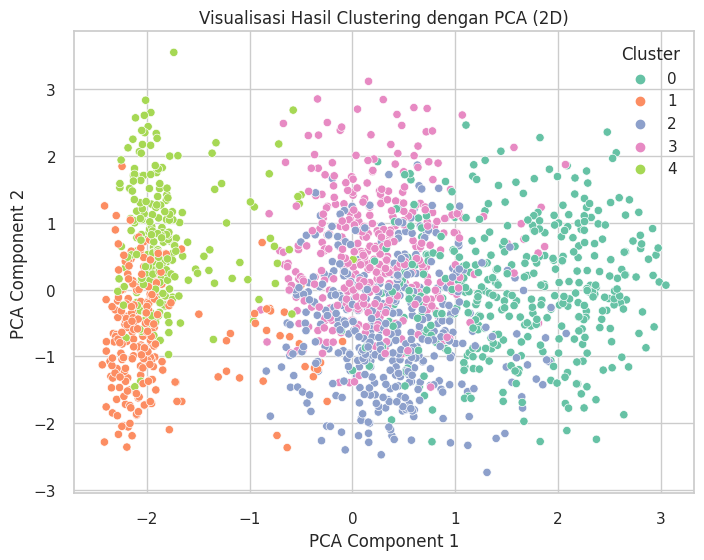

In [106]:
# 5. Visualisasi hasil clustering dengan PCA 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set2', legend='full')
plt.title('Visualisasi Hasil Clustering dengan PCA (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [107]:
# 6. Simpan model clustering dan PCA
joblib.dump(kmeans, "model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

print("Model KMeans dan PCA berhasil disimpan.")

NameError: name 'joblib' is not defined

In [ ]:
# 7. Visualisasi hasil clustering dengan PCA (2D)
# Mulai dari dataframe awal
print(len(df))  

# Preprocessing, cleaning (jika ada drop rows)
df_clean = df.copy()  

# Scaling fitur numerik (pastikan sesuai jumlah baris df_clean)
scaled_data = scaler.fit_transform(df_clean[num_cols])

print(scaled_data.shape)  # harus (1707, jumlah_fitur)

# PCA fit transform di data yang sudah diskalakan
pca_result = pca.fit_transform(scaled_data)

print(pca_result.shape)  # harus (1707, 2)

# Assign ke df_clean (bukan df asli jika berbeda)
df_clean['pca1'] = pca_result[:, 0]
df_clean['pca2'] = pca_result[:, 1]


In [ ]:
# 8. Karakteristik tiap cluster (analisis deskriptif)
# Misal hasil clustering sudah ada
df['cluster'] = kmeans.labels_

# Analisis deskriptif tiap cluster
print("Karakteristik tiap cluster:")
desc_stats = df.groupby('cluster').agg(['mean', 'min', 'max'])
print(desc_stats)


In [ ]:
# 9. Ekspor data ke CSV dengan kolom Target
df.to_csv('data_clustering_with_target.csv', index=False)
print("Data hasil clustering dengan kolom Target berhasil disimpan di 'data_clustering_with_target.csv'")

# 8. PENILAIAN

In [ ]:
# Gabungkan X dan y dulu supaya rows sinkron
data_all = pd.concat([X, y], axis=1)

# Buang row yang ada NaN
data_all_clean = data_all.dropna()

# Pisahkan kembali
X_clean = data_all_clean.iloc[:, :-1]
y_clean = data_all_clean.iloc[:, -1]

print(f"Jumlah data setelah clean: {X_clean.shape[0]}, label: {len(y_clean)}")

In [ ]:
# Gabungkan X dan y supaya bisa sinkron drop NaN dan baris yang tidak lengkap
data_all = pd.concat([X, y], axis=1)

# Buang baris yang mengandung missing values
data_all_clean = data_all.dropna()

# Pisahkan kembali X dan y yang sudah bersih
X_clean = data_all_clean.iloc[:, :-1]
y_clean = data_all_clean.iloc[:, -1]

print(f"Jumlah data setelah cleaning: {X_clean.shape[0]}, label: {len(y_clean)}")

# Feature selection langkah pertama: buang fitur yang variance-nya nol
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

selector_var = VarianceThreshold(threshold=0)
X_var = selector_var.fit_transform(X_clean)
selected_columns = X_clean.columns[selector_var.get_support()]

# Pastikan k tidak melebihi jumlah fitur tersisa
k = min(10, X_var.shape[1])

# SelectKBest untuk memilih fitur terbaik
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X_var, y_clean)

selected_features = selected_columns[selector.get_support()]
print("Fitur terbaik yang dipilih:", list(selected_features))


In [ ]:
# Gabungkan fitur dan target supaya bisa drop baris dengan missing values di kedua sisi secara sinkron
data_all = pd.concat([X[selected_features], y], axis=1)

# Drop semua baris yang memiliki missing value di fitur maupun label
data_all_clean = data_all.dropna()

# Pisahkan kembali fitur dan target yang sudah bersih
X_clean = data_all_clean.iloc[:, :-1]
y_clean = data_all_clean.iloc[:, -1]

print(f"Jumlah data setelah cleaning: {X_clean.shape[0]}, label: {len(y_clean)}")

# Baru split data yang sudah bersih dan sinkron
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.3, random_state=42
)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")

In [ ]:
# Build classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

In [ ]:
# Predict dan evaluasi
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
joblib.dump(clf, 'model_klasifikasi.h5')
print("Model klasifikasi berhasil disimpan.")